In [ ]:
# this code predicts if a passenger will survive or not on titanic dataset

In [18]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 
from pandas import DataFrame
from __future__ import absolute_import, division,print_function,unicode_literals
import seaborn as sns

In [2]:
dftrain = pd.read_csv("titanic-Dataset.csv") #load titanic data

In [3]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dftrain.shape  # number of rows and columns of titanic datat

(891, 12)

In [9]:
dftrain.describe()  # missing in age column values of passengers by (891-714) 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
dftrain['Survived'].value_counts()  #count number of survivors in titanic [0:549 not survived]  [1:342 survived]


0    549
1    342
Name: Survived, dtype: int64

D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

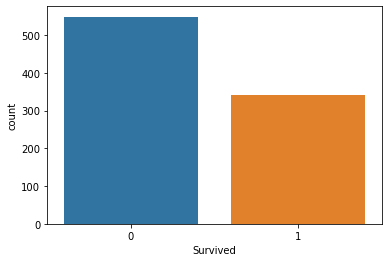

In [13]:
sns.countplot( dftrain['Survived'] )  #visualise num of survivors and people that didnot survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

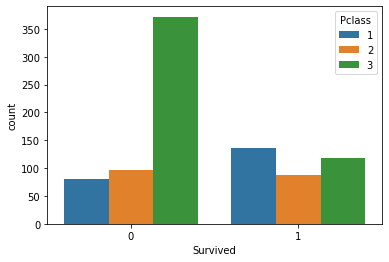

In [34]:
#visualise count of survivors for columns ['Sex','Pclass','Embarked','SibSp']]
snb.countplot(x='Survived',data=dftrain,hue = 'Pclass')
# as we see if a passenger in third class so they have high probability to not be survived




<AxesSubplot:xlabel='Survived', ylabel='count'>

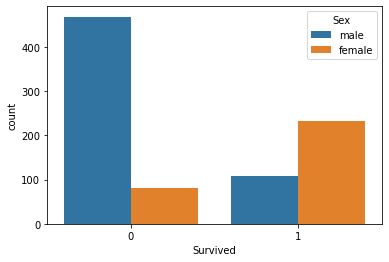

In [44]:
snb.countplot(x='Survived',data=dftrain,hue='Sex') #visualise count of survivors for columns ['Sex']

# as shown in graph most of passengers are males and the probabilty of females to be survived greater than men




<AxesSubplot:xlabel='Survived', ylabel='count'>

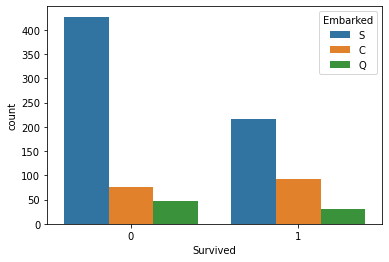

In [46]:

#visualise count of survivors for columns [Embarked]
snb.countplot(x='Survived',data=dftrain,hue='Embarked')
# as shown in graph most of passengers are from southampton and if passenger is from 's' so it may be not survived  



<AxesSubplot:xlabel='SibSp', ylabel='count'>

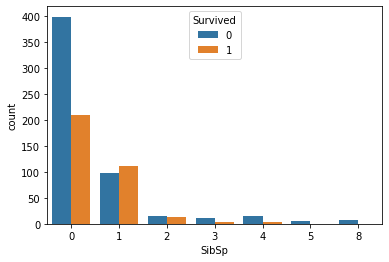

In [48]:
snb.countplot(x='SibSp',data=dftrain,hue='Survived')
# as shown in graph passengers that didnot have siblings most of them didnot survive

<AxesSubplot:xlabel='Parch', ylabel='count'>

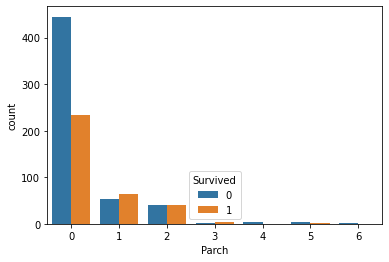

In [50]:

snb.countplot(x='Parch',data=dftrain,hue='Survived')
# as shown passengers that came with parent they have high chance to survived and the chance of passengers that didnot 
#come with parent may not be survived


In [52]:
dftrain.pivot_table('Survived',index='Sex', columns='Pclass')
# passengers that are females and from first class have 96.8 chance to be survived  while males have 36.8 chance to be survived
#males in third class have 0.135 chance to be survived

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [56]:
age = pd.cut(dftrain['Age'],[0,18,80])
dftrain.pivot_table('Survived',['Sex',age],'Pclass')
# males less than 18 years old from first class have 0.8 chance to be survived
# and from second class have 0.6 chance to be survived
# males greater than 18 years old from second class have 0.07 chance to be survived
# and from second class have 0.13 chance to be survived



Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [57]:
dftrain.isna().sum()  # 177 values is missing in age column ,687 in cabin and 2 in embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:


# To check which are all the columns having numerical values
num=dftrain.median().index
num



C:\Users\LEGION\AppData\Local\Temp\ipykernel_34132\566006343.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  num=dftrain.median().index


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [64]:


# to check which are all the columns having categorical values (except numerical colums)
categorical=[i for i in dftrain.columns if i not in num]
categorical



['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [72]:
# Replace the null values in numerical columns with "median"
# Replace the null values in categorical cloumns with "average counts"
for i in categorical:
    dftrain[i].fillna(dftrain[i].value_counts().index[0],inplace=True)
for i in num:
    dftrain[i].fillna(dftrain[i].median(),inplace=True)    

In [73]:
dftrain.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#Encode Sex column
dftrain.iloc[:,4]=labelencoder.fit_transform(dftrain.iloc[:,4].values)
#Encode Embark column
dftrain.iloc[:,11]=labelencoder.fit_transform(dftrain.iloc[:,11].values)

In [89]:
print(dftrain['Sex'].unique())
print(dftrain['Embarked'].unique())
dftrain.dtypes

[1 0]
[2 0 1]


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [ ]:
dftrain.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [98]:
dftrain.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [100]:
# split data 
X =dftrain.iloc[:,1:8].values
Y = dftrain.iloc[:,0].values
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  0.    , 28.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

In [103]:
# split data  into 80% training 20% test
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [106]:
#scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(x_test)

In [117]:
def models(X_train, Y_train):
    #use logestic regression
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(random_state=0)
    logreg.fit(X_train, Y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #Use SVC linear kernel
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    #Use SVC rbf kernel
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    
    print('[0] logistic regression training accuracy',logreg.score(X_train,Y_train))
    print('[1] KNeighbors training accuracy',knn.score(X_train,Y_train))
    print('[2] SVC linear kernel training accuracy',svc_lin.score(X_train,Y_train))
    print('[3] SVC rbf kernel training accuracy',svc_rbf.score(X_train,Y_train))
    print('[4] GaussianNB regression training accuracy',gauss.score(X_train,Y_train))
    
    return logreg, knn, svc_lin, svc_rbf, gauss
  



In [118]:
#get and train all of the models
model =models(X_train,Y_train)
# as shown the best accuracy Training data in KNeighbour model with accuracy =86.65%

[0] logistic regression training accuracy 0.7991573033707865
[1] KNeighbors training accuracy 0.8665730337078652
[2] SVC linear kernel training accuracy 0.7865168539325843
[3] SVC rbf kernel training accuracy 0.8426966292134831
[4] GaussianNB regression training accuracy 0.7879213483146067


D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


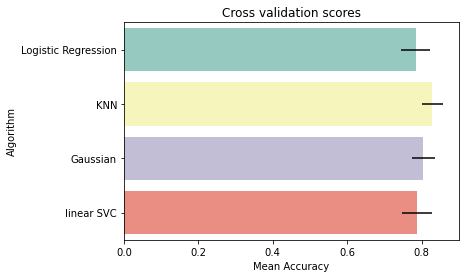

In [132]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2

classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['Logistic Regression',  'KNN', 'Gaussian',
     'linear SVC']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [136]:
# get accuracy score in testing data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm=confusion_matrix(y_test, model[i].predict(x_test))
    TN,FP,FN,TP =confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    test_score= (TP+TN)/(TP+TN+FN+FP)
    
    print(cm)
    print('Model[{}] testing accuracy = ""{}""'.format(i,test_score))
    print()
    
# as shown model 0 (logestic regression) has best accuracy in test data   

[[96 14]
 [19 50]]
Model[0] testing accuracy = ""0.8156424581005587""

[[98 12]
 [22 47]]
Model[1] testing accuracy = ""0.8100558659217877""

[[92 18]
 [20 49]]
Model[2] testing accuracy = ""0.7877094972067039""

[[98 12]
 [22 47]]
Model[3] testing accuracy = ""0.8100558659217877""

[[90 20]
 [17 52]]
Model[4] testing accuracy = ""0.7932960893854749""



In [148]:
# predict my survival
# my_survival = [class,sex,age,sibsp,fare,embarked]
my_survival=[[3,1,23,1,1,0,1]]
my_survival_scaled=sc.fit_transform(my_survival)

# predict using KNeighbors model 
pred = model[0].predict(my_survival_scaled)
print(pred)

if pred == 0:
    print('ohhh not survived')
else:
    print('etktbly 3omr gdeed')

[0]
ohhh not survived
